# **Introduction to Data Science Final Project**

**Student Information:**

StudentID|Full Name
-|-
21127012|Tran Huy Ban
21127050|Tran Nguyen Huan 
21127143|Nguyen Minh Quan 
21127175|Le Anh Thu


## **Table of contents**

[Overview](#overview)

1. [Data Collection](#collect)
   

    b. [Collecting data](#collecting)
   
3. [Data Pre-processing](#process)

    a. [Pre-precessing](#preprocess)

    b. [Exploration](#exploration)
       
4. [Data Modeling](#modeling)

5. [Deploy Model](#deploy)

[References](#references)

## **Overview** <a name="overview"></a>

<center>
<h3>
    <b>
    Movie Recommendations: Explore a World of Cinematic Brilliance
    </b>
</h3>
    <img style="padding:10px" src="https://beebom.com/wp-content/uploads/2019/08/netflix-family-movies-featured.jpg?w=750&quality=75" width="800"/>
</center>

Looking for your next movie night delight? Our recommendation engine, powered by [The Movie Database (TMDB) API](#https://developer.themoviedb.org/docs), is here to guide you through a curated list of cinematic gems that promise both captivating overviews and significant impact. Let's dive into why these movies should be on your must-watch list:

- Each recommended movie comes with a unique and compelling overview that provides a glimpse into the storyline. From heartwarming dramas to spine-chilling thrillers, our selection covers a diverse range of genres. Whether you're in the mood for a gripping narrative or a light-hearted adventure, our recommendations offer intriguing synopses to help you make the perfect choice.

- Beyond just entertaining, these movies have left a lasting impact on audiences worldwide. They have resonated with viewers, sparking discussions and leaving a mark on the world of cinema. Prepare to embark on an unforgettable journey as you explore films that have not only earned critical acclaim but have also contributed to the cultural tapestry of the film industry.

### **Necessary Libraries and Key**

In [1]:
import requests
import csv
import pandas as pd
import os
import ast 
import re 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
# Hiding warnings for cleaner display
import warnings
warnings.filterwarnings('ignore')

In [2]:
API_KEY = '15d786cc910b647049be3fc40ce9f3a2'

## **1. Data Collection** <a name="collect"></a>

Download movie dataset via API

In [3]:
base_url = 'https://api.themoviedb.org/3/'
movie_endpoint = 'movie/top_rated'

movies_file_path= 'Data/movies.csv'
discover_url = f'{base_url}{movie_endpoint}?api_key={API_KEY}&page={1}'
print(discover_url)
page = 1
total_pages = 50
header = []

if not os.path.exists(movies_file_path):
    movies_data = []
    
    while page <= total_pages:
        discover_url = f'{base_url}{movie_endpoint}?api_key={API_KEY}&page={page}'
        print(discover_url)
        discover_response = requests.get(discover_url)
    
        if discover_response.status_code == 200:
            discover_data = discover_response.json()
    
            if total_pages == 1:
                total_pages = discover_data['total_pages']
    
            if page == 1:
                header = list(discover_data['results'][0].keys())
                movies_data.append(header)
    
            for movie in discover_data['results']:
                movies_data.append([movie[field] for field in header])
    
            page += 1
            
        else:
            print(f"Error: Failed to retrieve discovered movies. Status Code: {discover_response.status_code}")
            break
            
    with open(movies_file_path, 'w', newline='', encoding='utf-8') as movies_file:
        movies_writer = csv.writer(movies_file)
        movies_writer.writerows(movies_data)
else:
    print(f"The file {movies_file_path} already exists.")

https://api.themoviedb.org/3/movie/top_rated?api_key=15d786cc910b647049be3fc40ce9f3a2&page=1
The file Data/movies.csv already exists.


Load movie dataset into dataframe

In [4]:
movies_df = pd.read_csv('Data/movies.csv')
movies_df.head(2)

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count
0,False,/tmU7GeKVybMWFButWEGl2M4GeiP.jpg,"[18, 80]",238,en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",142.683,/3bhkrj58Vtu7enYsRolD1fZdja1.jpg,1972-03-14,The Godfather,False,8.709,18971
1,False,/kXfqcdQKsToO0OUXHcrrNCHDBzO.jpg,"[18, 80]",278,en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,110.139,/q6y0Go1tsGEsmtFryDOJo3dEmqu.jpg,1994-09-23,The Shawshank Redemption,False,8.705,24958


But, we want more information about each movie in those dataset. So, we will get the list of casts in each movie

In [5]:
movies_with_casts_file_path = 'Data/movies_with_casts.csv'

if not os.path.exists(movies_with_casts_file_path):
    header.append('casts')
    
    for movie_info in movies_data[1:]:  
        movie_id = movie_info[header.index('id')]
        credits_url = f'{base_url}movie/{movie_id}/credits?api_key={API_KEY}'
        credits_response = requests.get(credits_url)
    
        if credits_response.status_code == 200:
            credits_data = credits_response.json()
            movie_credits = credits_data.get('cast', []) 
        else:
            movie_credits = []
    
        movie_info.append(movie_credits)
    
    with open(movies_with_casts_file_path, 'w', newline='', encoding='utf-8') as movies_file:
        movies_writer = csv.writer(movies_file)
        movies_writer.writerows(movies_data)
else:
    print(f"The file {movies_with_casts_file_path} already exists.")    

The file Data/movies_with_casts.csv already exists.


In [6]:
df = pd.read_csv('Data/movies_with_casts.csv')
df.head(2)

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count,casts
0,False,/tmU7GeKVybMWFButWEGl2M4GeiP.jpg,"[18, 80]",238,en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",142.683,/3bhkrj58Vtu7enYsRolD1fZdja1.jpg,1972-03-14,The Godfather,False,8.709,18971,"[{'adult': False, 'gender': 2, 'id': 3084, 'kn..."
1,False,/kXfqcdQKsToO0OUXHcrrNCHDBzO.jpg,"[18, 80]",278,en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,110.139,/q6y0Go1tsGEsmtFryDOJo3dEmqu.jpg,1994-09-23,The Shawshank Redemption,False,8.705,24958,"[{'adult': False, 'gender': 2, 'id': 504, 'kno..."


Looks like we have enough data to solve our problem

## **2. Data Pre-processing** <a name="process"></a>

### **a. Pre-processing** <a name="preprocess"></a>

Firstly, we should inspect our data.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   adult              1000 non-null   bool   
 1   backdrop_path      1000 non-null   object 
 2   genre_ids          1000 non-null   object 
 3   id                 1000 non-null   int64  
 4   original_language  1000 non-null   object 
 5   original_title     1000 non-null   object 
 6   overview           1000 non-null   object 
 7   popularity         1000 non-null   float64
 8   poster_path        1000 non-null   object 
 9   release_date       1000 non-null   object 
 10  title              1000 non-null   object 
 11  video              1000 non-null   bool   
 12  vote_average       1000 non-null   float64
 13  vote_count         1000 non-null   int64  
 14  casts              1000 non-null   object 
dtypes: bool(2), float64(2), int64(2), object(9)
memory usage: 103.6+ KB


We can see that our data have no empty/null data. So, we skip handle null data.

In [8]:
df.shape

(1000, 15)

Our dataset have 15 columns with 1000 rows

Then, we check for duplicates in our data

In [9]:
duplicates = df[df.duplicated()]
print(f"\nNumber of duplicates: {len(duplicates)}")


Number of duplicates: 8


In [10]:
df = df.drop_duplicates()
df = df.dropna()

In [11]:
duplicates = df[df.duplicated()]
print(f"\nCheck number of duplicates again: {len(duplicates)}")


Check number of duplicates again: 0


#### **Feature Selection**

Our original data has 13 columns but we don't need to parse the entire column. We should select some important columns for better analyze.

In [12]:
# Feature Selection
selected_columns = ['genre_ids', 'id', 'overview', 'popularity', 'release_date', 'title', 'vote_average', 'vote_count', 'casts']
df = df[selected_columns]

In [13]:
df.head(2)

,genre_ids,id,overview,popularity,release_date,title,vote_average,vote_count,casts
0,"[18, 80]",238,"Spanning the years 1945 to 1955, a chronicle o...",142.683,1972-03-14,The Godfather,8.709,18971,"[{'adult': False, 'gender': 2, 'id': 3084, 'kn..."
1,"[18, 80]",278,Framed in the 1940s for the double murder of h...,110.139,1994-09-23,The Shawshank Redemption,8.705,24958,"[{'adult': False, 'gender': 2, 'id': 504, 'kno..."


#### **Arrange columns**

We need to rearrange the order of the columns to make them more accurate

In [14]:
df = df[['id', 'genre_ids', 'title', 'popularity', 'release_date', 'vote_average', 'vote_count', 'casts']]
df.head(2)

,id,genre_ids,title,popularity,release_date,vote_average,vote_count,casts
0,238,"[18, 80]",The Godfather,142.683,1972-03-14,8.709,18971,"[{'adult': False, 'gender': 2, 'id': 3084, 'kn..."
1,278,"[18, 80]",The Shawshank Redemption,110.139,1994-09-23,8.705,24958,"[{'adult': False, 'gender': 2, 'id': 504, 'kno..."


#### **Change value in columns**

In the release date column, we only extract the year, no need to get the full date

In [15]:
df['release_date'] = pd.to_datetime(df['release_date']).dt.year
df = df.rename(columns={'release_date': 'release_year'})
df.head(2)

,id,genre_ids,title,popularity,release_year,vote_average,vote_count,casts
0,238,"[18, 80]",The Godfather,142.683,1972,8.709,18971,"[{'adult': False, 'gender': 2, 'id': 3084, 'kn..."
1,278,"[18, 80]",The Shawshank Redemption,110.139,1994,8.705,24958,"[{'adult': False, 'gender': 2, 'id': 504, 'kno..."


#### **Correct data type**

The data type of the genre_ids column is an object with a number, so we need to clarify what the movie genre is. Let's get category name from API:

In [16]:
url = f"http://api.themoviedb.org/3/genre/movie/list?api_key={API_KEY}"
response = requests.get(url)
genres = response.json().get('genres', [])
genre_names = {genre['id']: genre['name'] for genre in genres}
genre_names

{28: 'Action',
 12: 'Adventure',
 16: 'Animation',
 35: 'Comedy',
 80: 'Crime',
 99: 'Documentary',
 18: 'Drama',
 10751: 'Family',
 14: 'Fantasy',
 36: 'History',
 27: 'Horror',
 10402: 'Music',
 9648: 'Mystery',
 10749: 'Romance',
 878: 'Science Fiction',
 10770: 'TV Movie',
 53: 'Thriller',
 10752: 'War',
 37: 'Western'}

In [17]:
df['genre_ids'] = df['genre_ids'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

def map_genre_ids_to_names(genre_ids):
    if isinstance(genre_ids, list):
        return [genre_names[genre_id] for genre_id in genre_ids]
    else:
        return []

df['genre_names'] = df['genre_ids'].apply(map_genre_ids_to_names)
df.head(2)

,id,genre_ids,title,popularity,release_year,vote_average,vote_count,casts,genre_names
0,238,"[18, 80]",The Godfather,142.683,1972,8.709,18971,"[{'adult': False, 'gender': 2, 'id': 3084, 'kn...","[Drama, Crime]"
1,278,"[18, 80]",The Shawshank Redemption,110.139,1994,8.705,24958,"[{'adult': False, 'gender': 2, 'id': 504, 'kno...","[Drama, Crime]"


In [18]:
df = df.drop('genre_ids', axis=1)
df.head(2)

,id,title,popularity,release_year,vote_average,vote_count,casts,genre_names
0,238,The Godfather,142.683,1972,8.709,18971,"[{'adult': False, 'gender': 2, 'id': 3084, 'kn...","[Drama, Crime]"
1,278,The Shawshank Redemption,110.139,1994,8.705,24958,"[{'adult': False, 'gender': 2, 'id': 504, 'kno...","[Drama, Crime]"


Finally, we convert genre_ids to genre_names 

#### **Extract all actors' name in column casts**

In [19]:
def extract_name(row):
    pattern = r"'name':\s*'([^']*)'"
    matches = re.findall(pattern, row)
    return matches

df['casts'] = df['casts'].apply(extract_name)

df.head(2)

,id,title,popularity,release_year,vote_average,vote_count,casts,genre_names
0,238,The Godfather,142.683,1972,8.709,18971,"[Marlon Brando, Al Pacino, James Caan, Robert ...","[Drama, Crime]"
1,278,The Shawshank Redemption,110.139,1994,8.705,24958,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will...","[Drama, Crime]"


After extracting, only the names of the actors are retained

### **b. Exploration** <a name="exploration"></a>

### **Basic level description**

In [20]:
# How many rows and columns are there in the data?
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 992
Number of columns: 8


In [21]:
# What is the meaning of each row/column after preprocessing?
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 992 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            992 non-null    int64  
 1   title         992 non-null    object 
 2   popularity    992 non-null    float64
 3   release_year  992 non-null    int32  
 4   vote_average  992 non-null    float64
 5   vote_count    992 non-null    int64  
 6   casts         992 non-null    object 
 7   genre_names   992 non-null    object 
dtypes: float64(2), int32(1), int64(2), object(3)
memory usage: 65.9+ KB


In [22]:
# What is the datatype of each column? Is this suitable datatype for the column?
df.dtypes

id                int64
title            object
popularity      float64
release_year      int32
vote_average    float64
vote_count        int64
casts            object
genre_names      object
dtype: object

**Comment**: The datatypes chosen for all the columns are appropriate for the dataset and that can proceed with further analysis, processing, or any other actions later.

In [23]:
# What is the distribution of the data in each column?
df.describe()

,id,popularity,release_year,vote_average,vote_count
count,9.920000e+02,992.000000,992.000000,992.000000,992.000000
mean,1.910366e+05,43.739479,1995.470766,7.897981,4124.322581
std,2.628580e+05,102.621345,25.566382,0.232909,5782.546609
min,1.100000e+01,0.600000,1902.000000,7.588000,300.000000
25%,1.116250e+03,14.841000,1977.000000,7.705000,598.750000
50%,2.096650e+04,23.201000,2004.000000,7.850000,1457.000000
75%,3.783735e+05,43.064750,2017.000000,8.044750,4993.500000
max,1.076364e+06,2287.202000,2023.000000,8.709000,34775.000000


**Comment**: It can be observed that, since these are data for the top 1000 highest-rated movies, the average rating is quite high. However, to achieve a score of 8 or above is not very common, with just over 25% of the highest-rated movies scoring above 8 points. Additionally, among these movies, half of them were produced from the year 2000 onwards, while the other half span from the early years of the 20th century to the end of the 20th century.

### **Further Exploration**

#### **Question 1**
How many movies based on their genres were produced? Which genres has the most movies produced?

**Meaning**: To understand viewers' preferences and grasp the trends of popular film genres, this will be beneficial for producers in aiming to develop the market and marketing strategies. (one movie also has more than one genres)


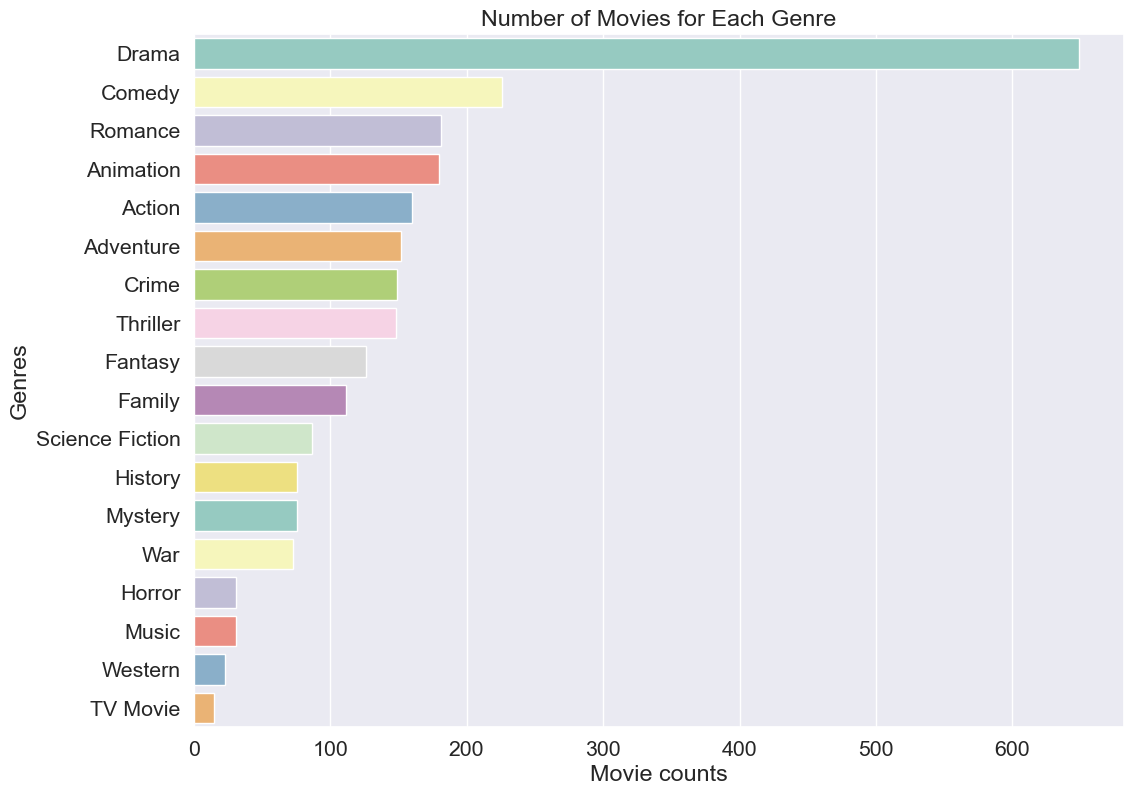

In [24]:
genres_series = df['genre_names'].explode() # Explode the list of genres into rows

genre_counts = genres_series.value_counts()

genre_counts = genre_counts.sort_values(ascending=False)   # Sort the genres by their counts

#draw the bar chart
plt.figure(figsize=(12, 9))

sns.set(rc={'figure.figsize': (12, 9)}, font_scale=1.4)
ax = sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="Set3")

ax.set(xlabel='Movie counts', ylabel='Genres', title='Number of Movies for Each Genre')
plt.show()

#### **Observation**
- Based on the chart, it can be seen that drama is the most dominant film genre, accounting for over 600 films (more than 60%) among the highest-rated films on TMDB. This indicates that viewers seem to have a preference for this genre.

- For other genres, excluding comedy and drama, no genre has more than 200 films (20%). This reflects diversity in various film genres, with no significant imbalance.

- Some genres such as Horror, Music, Western, and TV Movie seem to be less popular, attracting a smaller audience.

#### **Question 2**
What is the average vote distribution across different movie genres?

**Meaning**: Understanding insights into the general audience preferences for various genres. It helps in identifying genres that tend to receive higher or lower average votes, which could be valuable for filmmakers, producers, and distributors in decision-making processes related to content creation and marketing strategies.

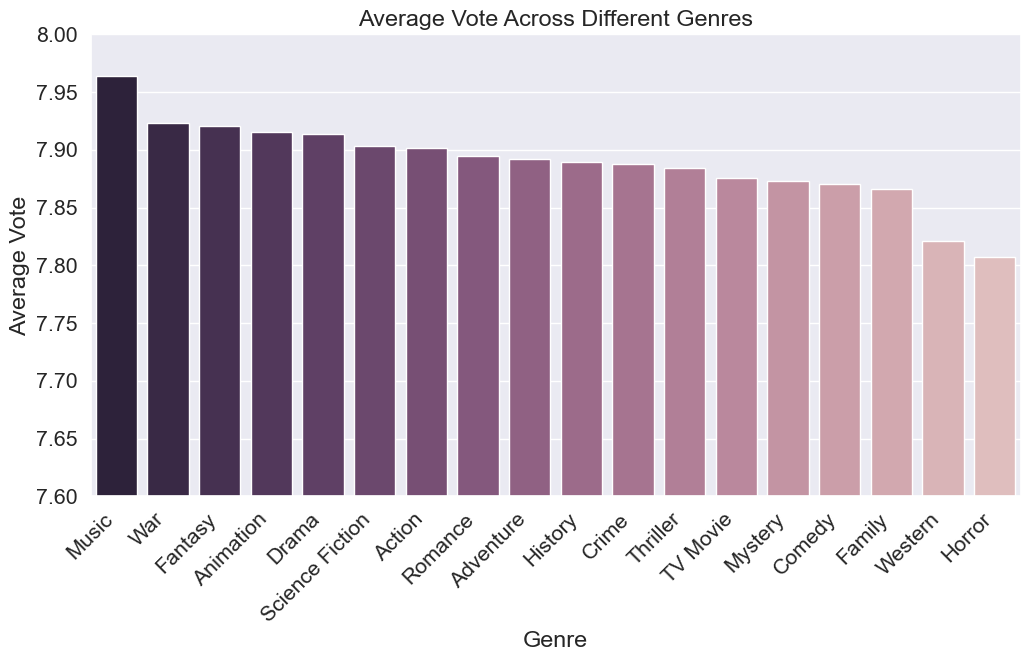

In [25]:
df_exploded = df.explode('genre_names')

# Group by genre and calculate average vote
genre_avg_vote = df_exploded.groupby('genre_names')['vote_average'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_avg_vote.index, y=genre_avg_vote.values, palette=sns.cubehelix_palette(n_colors=20, reverse=True))
plt.title('Average Vote Across Different Genres')
plt.xlabel('Genre')
plt.ylabel('Average Vote')
plt.xticks(rotation=45, ha='right')

# Limit the y-axis values between 7.6 and 8
plt.ylim(7.6, 8)

plt.show()

#### **Observation**
- In general, the average audience vote scores for the genres do not have a significant difference (values's score ​​range from 7.8 to 8).

- The `Music` genre stands out as the top-rated genre. This suggests that movies in the Music genre, potentially including musicals or films centered around music, tend to resonate well with audiences, eliciting higher levels of satisfaction.

- The `War` and `Fantasy` genres, following closely in average votes, indicate a substantial audience interest in movies featuring themes related to war or fantasy worlds. This trend can guide content creators and filmmakers in developing and promoting content within these genres.

- The lower average votes for `Western` and `Horror` genres suggest that movies in these categories may face challenges in resonating with the broader audience.

#### **Question 3**
Who are the most influential actors across movies, and what is their distribution?

**Meaning**: Recognizing the actors who have played a significant role in various movies. It helps in understanding the key contributors to the film industry's success. Producers and directors can use this information to cast actors who have a proven track record of influence, potentially enhancing a movie's marketability.

The word cloud visually represents the most influential actors across movies, with the size of each actor's name indicating their level of influence.

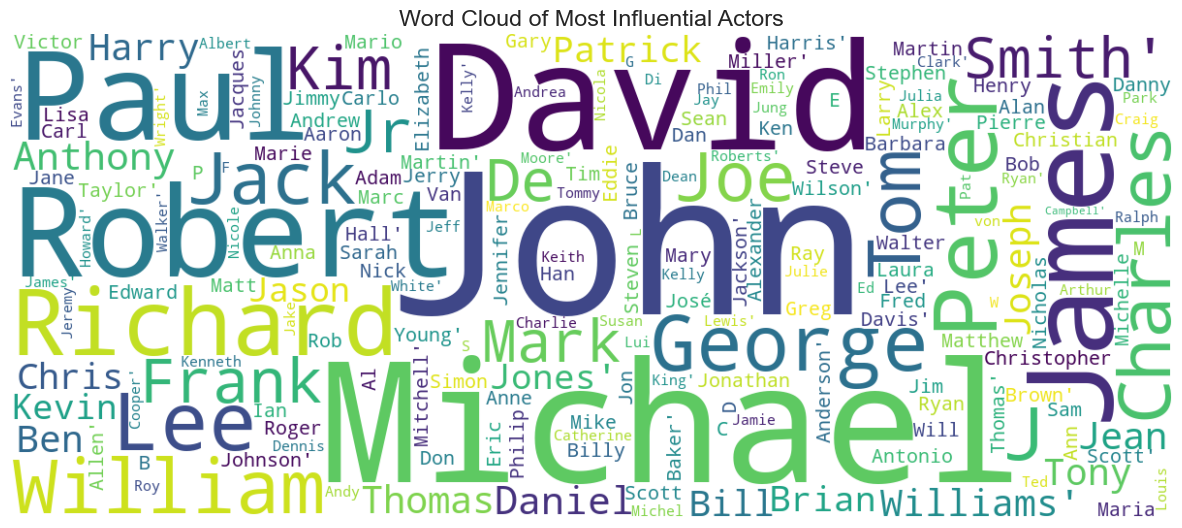

In [26]:
# Combine all actors into a single string
all_actors = ', '.join(df['casts'].astype(str).values)

# Generate a word cloud
wordcloud = WordCloud(width=1200, height=500, background_color='white').generate(all_actors)

# Plot
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Influential Actors')
plt.show()


The visual impact of the word cloud makes it easy to identify the most prominent actors at a glance. Now let's visualize with bar charts which allows for a clear comparison of the influence of different actors, aiding in the identification of the most impactful individuals.

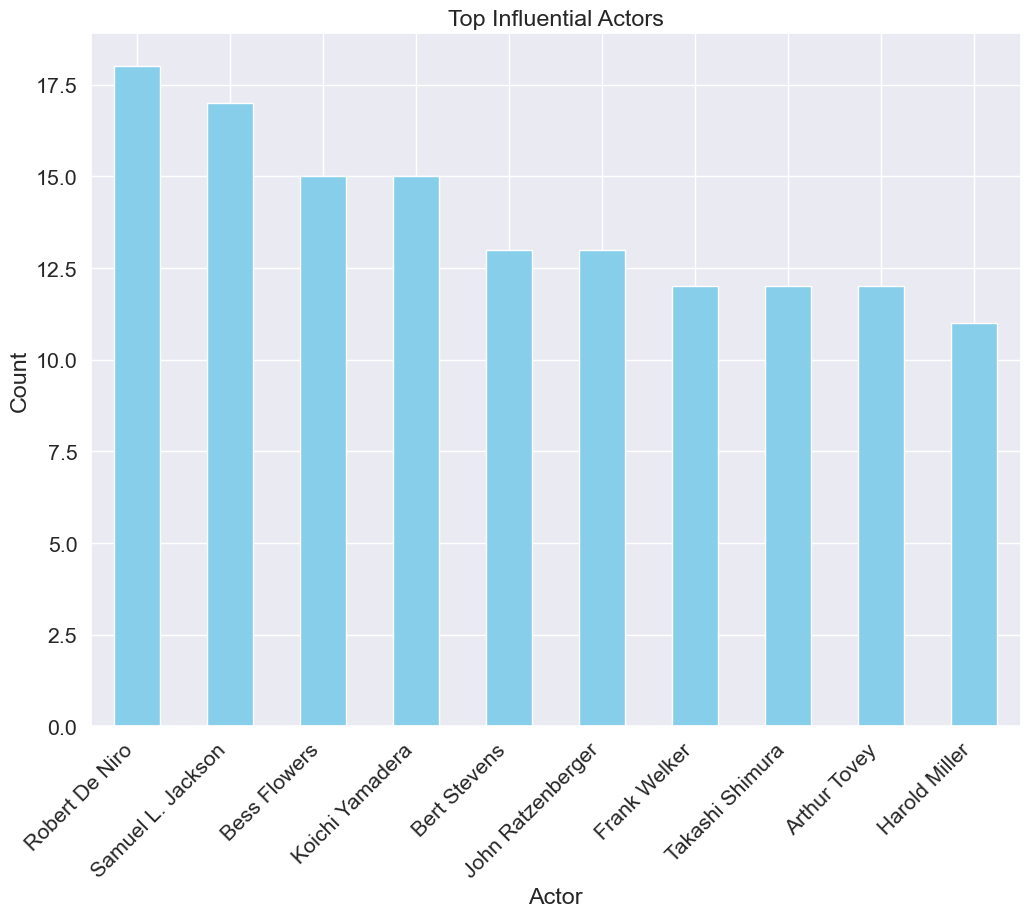

In [27]:
# Combine all actors into a single list
all_actors_list = [actor for sublist in df['casts'].astype(str).apply(eval) for actor in sublist]

# Count the occurrences of each actor
actor_counts = pd.Series(all_actors_list).value_counts()

# Choose the top N actors
top_n = 10
top_actors = actor_counts.head(top_n)

# Plot
plt.figure(figsize=(12, 9))
top_actors.plot(kind='bar', color='skyblue')
plt.xlabel('Actor')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Top Influential Actors')
plt.show()


#### **Observation**
- From wordcloud as above, we can see that some larger and bolder names such as `Michael`, `Robert`, `David`, `Paul`, `John`,... are more influential, suggesting they have been associated with a higher number of movies.

- As the top influential actor, `Robert De Niro`'s frequent appearances in movies make him a significant and reliable choice for filmmakers.

- While not surpassing `Robert De Niro`'s count, `Samuel L. Jackson` still holds a notable position as the second most influential actor.

-  `Bess Flowers` and `Koichi Yamadera`, while appearing in movies, has a considerably lower count than the top two actors.

#### **Question 4**
How do the number of votes and vote scores change over each period of year?

**Meaning**: To know the relevant and highly rated movies appropriate to the film's development stage that users may find interesting. At the same time, we can evaluate the prosperous periods of the film, as well as the periods when users are more easy-going or difficult.

In [28]:
print('Earliest year:', df['release_year'].min())
print('Latest year:', df['release_year'].max())

Earliest year: 1902
Latest year: 2023


We can divide it into year periods as follows: <br>
(`1902-1920`), (`1921-1940`), (`1941-1960`), (`1961-1980`), (`1981-2000`), (`2001-2023`)

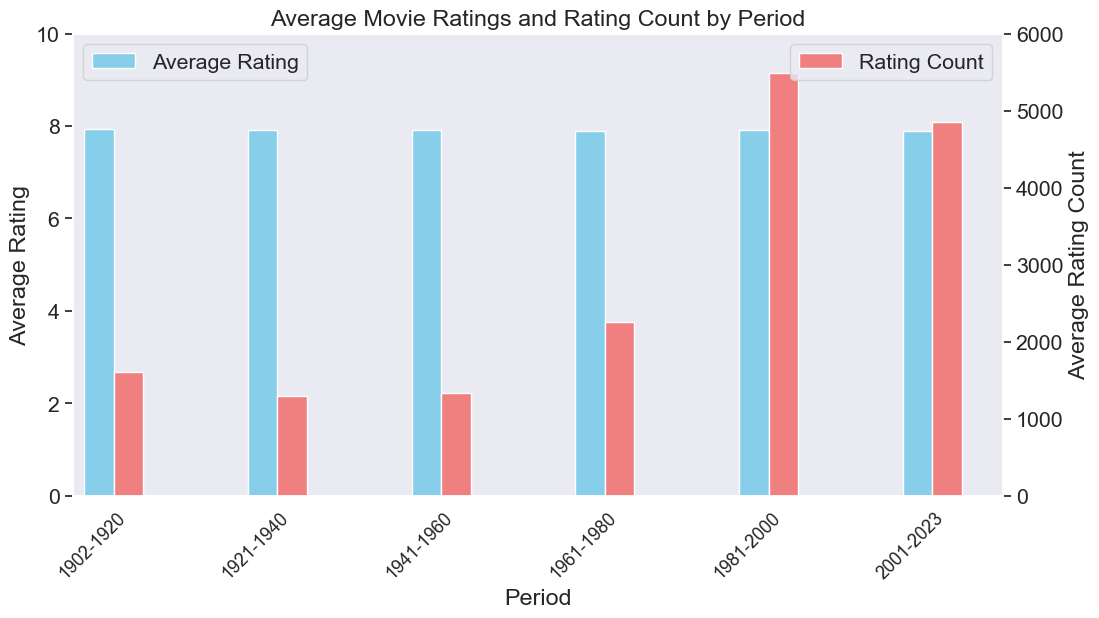

In [29]:
bins = [1902, 1920, 1940, 1960, 1980, 2000, 2023]
labels = ['1902-1920', '1921-1940', '1941-1960', '1961-1980', '1981-2000', '2001-2023']

df['period'] = pd.cut(df['release_year'], bins=bins, labels=labels, right=False)
grouped_data = df.groupby('period').agg({'vote_average': 'mean', 'vote_count': 'mean'})

plt.figure(figsize=(12, 6))
ax1 = plt.subplot()
grouped_data['vote_average'].plot(kind='bar', width=0.18, color='skyblue', position=1.5, ax=ax1, label='Average Rating')
plt.legend(loc='upper left')
plt.grid(False)
plt.ylim(0, 10)
plt.xticks(rotation=45, ha='right', fontsize=13)

ax2 = ax1.twinx()
grouped_data['vote_count'].plot(kind='bar', width=0.18, color='lightcoral', position=0.5, ax=ax2, label='Rating Count')
plt.legend(loc='upper right')
plt.grid(False)
plt.ylim(0, 6000)

plt.title('Average Movie Ratings and Rating Count by Period')
ax1.set_xlabel('Period')
ax1.set_ylabel('Average Rating')
ax2.set_ylabel('Average Rating Count')
plt.show()

df.drop('period', axis=1, inplace=True)

#### **Observation**
- `Average Ratings` (vote_average): There is a slight variation in average vote ratings across periods, but overall, it maintains a high level. The period 1961-1980 has the highest average vote rating, while the period 2001-2023 has the lowest, although the difference is not substantial.

- `Number of Votes` (vote_count): The number of votes increases significantly over time. Particularly, the period 1981-2000 and the period 2001-2023 have significantly higher vote counts compared to other periods. This notable increase may reflect the popularity of mass media and enhanced accessibility to the entertainment industry.

- `Trend`: The data indicates stability in the quality of ratings across periods, but there is considerable variation in the number of votes.

#### **Question 5**
Who are the actors with the highest average ratings and lowest average ratings?

**Meaning**: to identify and rank the actors based on their highest and lowest average ratings. The results are presented in the form of a bar chart, providing a visual representation of the top actors in terms of average viewer ratings. This question also recognize actors who have excelled in terms of average viewer ratings, providing valuable insights for both industry professionals and enthusiasts interested in the dynamics of audience appreciation in the realm of film.

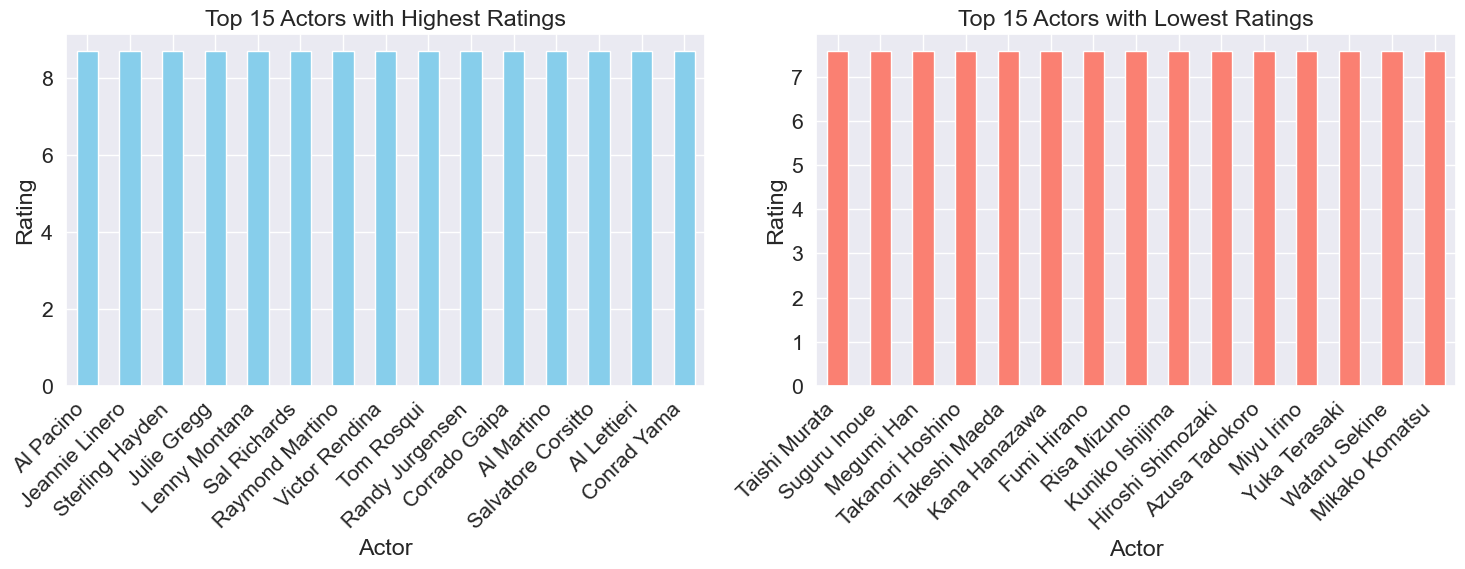

In [30]:
actors_df = df[['casts', 'vote_average']]
actors_df = actors_df.explode('casts')
top_actors = actors_df.groupby('casts')['vote_average'].max().sort_values(ascending=False)
bottom_actors = actors_df.groupby('casts')['vote_average'].min().sort_values()

num_top_actors = 15
top_actors = top_actors.head(num_top_actors)

num_bottom_actors = 15
bottom_actors = bottom_actors.head(num_bottom_actors)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
top_actors.plot(kind='bar', color='skyblue')
plt.title(f'Top {num_top_actors} Actors with Highest Ratings')
plt.xlabel('Actor')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
bottom_actors.plot(kind='bar', color='salmon')
plt.title(f'Top {num_bottom_actors} Actors with Lowest Ratings')
plt.xlabel('Actor')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

#### **Observation**
- `Highest Ratings`: A notable observation is that all listed actors, including Al Pacino, Jeannie Linero, Sterling Hayden, etc., share the same high rating of 8.709. This uniformity raises questions about potential data standardization or an underlying context that results in identical ratings for these actors.

- `Lowest Ratings`: Conversely, the actors listed with the lowest rating of 7.588 also share uniform scores. Similar to the highest ratings, this consistency prompts further investigation into the factors influencing the standardization of these particular ratings.

- The data provides a clear distinction between the highest and lowest ratings, but the uniformity in scores for both categories may limit the depth of insights derived from the dataset.

#### **Question 6**
Is there a relationship between popularity and the number of ratings of movies? Does popularity affect the number of votes?

**Meaning**: to understand how the popularity of a movie influences the quantity of ratings it receives, analyze audience reactions, and potentially predict a movie's popularity based on its number of ratings. Additionally, it provides insights into the interaction and feedback from the audience, reflecting the level of community engagement and interest in a film.

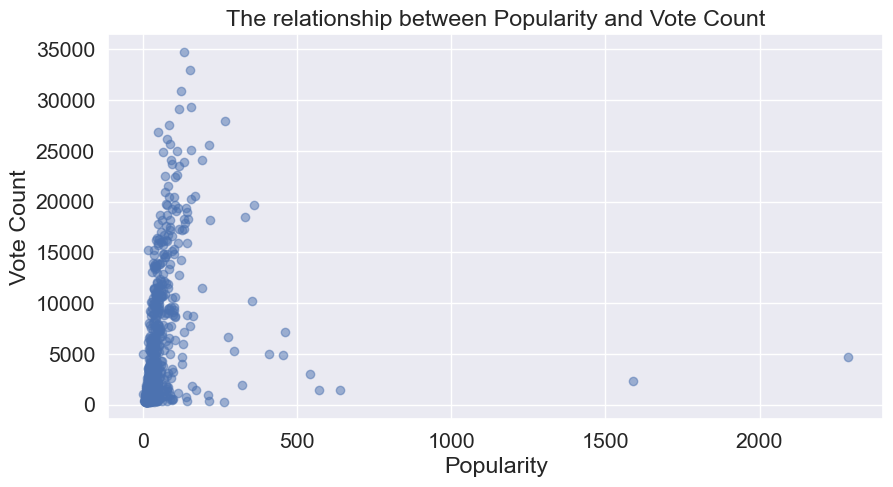

In [31]:
plt.figure(figsize=(10, 5))
plt.scatter(df['popularity'], df['vote_count'], alpha=0.5)
plt.title('The relationship between Popularity and Vote Count')
plt.xlabel('Popularity')
plt.ylabel('Vote Count')
plt.grid(True)
plt.show()

#### **Observation**
 - There is a positive correlation between the number of votes and popularity, but the correlation is not particularly strong based on the provided coefficients.

 - Some less popular films get many votes, indicating a dedicated fan base, while some highly popular movies may not have as many reviews. This shows that people don't only review movies based on their popularity.
 
 - Instead, they share their feelings and connections, making movie ratings more personal and subjective. In essence, a film's appeal goes beyond just being popular; it's about the emotional impact it has on viewers.

## **3. Data Modeling** <a name="modeling"></a>

In [32]:
model_df = df.copy()

In [33]:
model_df['casts'] = model_df['casts'] .apply(lambda x: ' '.join(x))

In [34]:
model_df['genre_names'] = model_df['genre_names'] .apply(lambda x: ' '.join(x))

In [35]:
model_df['tags'] = model_df['title'] + model_df['casts']+ model_df['genre_names']
model_df['tags']

0      The GodfatherMarlon Brando Al Pacino James Caa...
1      The Shawshank RedemptionTim Robbins Morgan Fre...
2      The Godfather Part IIAl Pacino Robert Duvall D...
3      Schindler's ListLiam Neeson Ben Kingsley Ralph...
4      Dilwale Dulhania Le JayengeShah Rukh Khan Kajo...
                             ...                        
995    The Longest DayHenry Fonda John Wayne Robert M...
996    Out of the PastRobert Mitchum Jane Greer Kirk ...
997    Billy ElliotJamie Bell Gary Lewis Julie Walter...
998    To All the Boys: Always and ForeverLana Condor...
999    The Garden of WordsMiyu Irino Kana Hanazawa Fu...
Name: tags, Length: 992, dtype: object

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, stop_words='english')

In [37]:
vector = cv.fit_transform(model_df['tags']).toarray()

In [38]:
vector.shape

(992, 5000)

In [39]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vector)

In [40]:
def recommend(movie):
    matching_movie = model_df[model_df['title'] == movie]
    if not matching_movie.empty:
        index = matching_movie.index[0]
        distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x: x[1])
        for i in distances[1:6]:
            print(model_df.iloc[i[0]].title)
    else:
        print(f"No movie {movie} found in the dataset!")

In [41]:
recommend("Harry Potter and the Deathly Hallows: Part 2") # example 1

Harry Potter and the Deathly Hallows: Part 1
Harry Potter and the Half-Blood Prince
Harry Potter and the Order of the Phoenix
Harry Potter and the Prisoner of Azkaban
Harry Potter and the Chamber of Secrets


In [42]:
recommend("Avengers: Infinity War") # example 2

Avengers: Endgame
Guardians of the Galaxy Vol. 2
Guardians of the Galaxy
The Dark Knight
The Avengers


In [43]:
import pickle 

pickle.dump(model_df, open('Model/movie_list.pkl', 'wb'))
pickle.dump(similarity, open('Model/similarity.pkl', 'wb'))

## **4. Deploy Model** <a name="deploy"></a>

## **References** <a name="references"></a>